In [1]:
! pip install torchviz
! pip install torchsummary
! pip install imblearn
!pip install efficientnet_pytorch
!pip install ultralytics
! pip install split-folders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#if you dont have dataset, you can download that from kaggle
import os
import kagglehub
import shutil

# Define the paths for the new directories
datasets_folder_path = '/content/drive/My Drive/Datasets'
knee_folder_path = os.path.join(datasets_folder_path, 'knee-osteoarthritis-classification')

# Create the directories
os.makedirs(knee_folder_path, exist_ok=True)

# Download latest version
path = kagglehub.dataset_download("fuyadhasanbhoyan/knee-osteoarthritis-classification-224224")

# Move the downloaded files to the 'brain tumor dataset' folder
for filename in os.listdir(path):
    shutil.move(os.path.join(path, filename), os.path.join(knee_folder_path, filename))

print("Dataset files downloaded to:", knee_folder_path)


100%|██████████| 32.7M/32.7M [00:00<00:00, 111MB/s] 

Extracting files...


Dataset files downloaded to: /content/drive/My Drive/Datasets/knee-osteoarthritis-classification


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import copy
import os
from sklearn.utils import resample
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split, Subset
from sklearn.model_selection import train_test_split
import torchvision
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn
from torchvision import utils
from torchvision.datasets import ImageFolder
from torchsummary import summary
import torch.nn.functional as F
import pathlib
from torch import optim
import torchvision.models as models
from torchviz import make_dot
from torchvision import models
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay , classification_report
import seaborn as sns
from efficientnet_pytorch import EfficientNet
from ultralytics import YOLO
import splitfolders




Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


#YOLOv8s finetuning

In [4]:


# Load YOLO model
model = YOLO("yolov8s-cls.pt")

# Train the model
model.train(
    data='/content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification',  # Correct path
    epochs=25,
    imgsz=224,
    batch=64,
    optimizer="AdamW",
    lr0=1e-3,
    weight_decay=1e-4,
    augment=True,
    patience=10
)


100%|██████████| 12.3M/12.3M [00:00<00:00, 81.5MB/s]


Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification, epochs=25, time=None, patience=10, batch=64, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

100%|██████████| 5.35M/5.35M [00:00<00:00, 130MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification/train... 3780 images, 0 corrupt: 100%|██████████| 3780/3780 [00:00<?, ?it/s]
val: Scanning /content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification/val... 1080 images, 0 corrupt: 100%|██████████| 1080/1080 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0001), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 25 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/25       1.3G      1.158         64        224:   3%|▎         | 2/60 [00:23<09:34,  9.90s/it]


100%|██████████| 755k/755k [00:00<00:00, 22.5MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [01:04<00:00,  7.16s/it]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]

                   all      0.647          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]

                   all      0.614          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:05<00:00,  1.64it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]

                   all      0.526          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]

                   all      0.677          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:06<00:00,  1.39it/s]

                   all      0.718          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:05<00:00,  1.54it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:05<00:00,  1.60it/s]

                   all      0.671          1



      Epoch    GPU_mem       loss  Instances       Size


      10/25      1.38G      0.614          4        224: 100%|██████████| 60/60 [00:36<00:00,  1.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]

                   all      0.753          1



      Epoch    GPU_mem       loss  Instances       Size


      11/25      1.34G     0.5701          4        224: 100%|██████████| 60/60 [00:35<00:00,  1.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]

                   all      0.748          1



      Epoch    GPU_mem       loss  Instances       Size


      12/25      1.38G     0.5824          4        224: 100%|██████████| 60/60 [00:37<00:00,  1.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:04<00:00,  1.94it/s]

                   all      0.741          1



      Epoch    GPU_mem       loss  Instances       Size


      13/25      1.39G     0.5631          4        224: 100%|██████████| 60/60 [00:35<00:00,  1.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:04<00:00,  1.90it/s]

                   all      0.688          1



      Epoch    GPU_mem       loss  Instances       Size


      14/25      1.38G     0.5184          4        224: 100%|██████████| 60/60 [00:35<00:00,  1.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:04<00:00,  1.88it/s]

                   all      0.754          1



      Epoch    GPU_mem       loss  Instances       Size


      15/25      1.36G     0.5029          4        224: 100%|██████████| 60/60 [00:35<00:00,  1.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:04<00:00,  1.95it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


      16/25      1.38G     0.5285          4        224: 100%|██████████| 60/60 [00:36<00:00,  1.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:04<00:00,  1.87it/s]

                   all      0.735          1



      Epoch    GPU_mem       loss  Instances       Size


      17/25      1.34G     0.4927          4        224: 100%|██████████| 60/60 [00:32<00:00,  1.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


      18/25      1.38G      0.457          4        224: 100%|██████████| 60/60 [00:36<00:00,  1.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:05<00:00,  1.63it/s]

                   all      0.764          1



      Epoch    GPU_mem       loss  Instances       Size


      19/25      1.39G     0.4373          4        224: 100%|██████████| 60/60 [00:33<00:00,  1.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]

                   all      0.758          1



      Epoch    GPU_mem       loss  Instances       Size


      20/25      1.38G     0.4389          4        224: 100%|██████████| 60/60 [00:32<00:00,  1.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:05<00:00,  1.66it/s]

                   all      0.771          1



      Epoch    GPU_mem       loss  Instances       Size


      21/25      1.36G     0.4023          4        224: 100%|██████████| 60/60 [00:32<00:00,  1.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:05<00:00,  1.75it/s]

                   all      0.779          1



      Epoch    GPU_mem       loss  Instances       Size


      22/25      1.38G     0.3978          4        224: 100%|██████████| 60/60 [00:32<00:00,  1.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:05<00:00,  1.78it/s]

                   all      0.781          1



      Epoch    GPU_mem       loss  Instances       Size


      23/25      1.34G     0.4048          4        224: 100%|██████████| 60/60 [00:33<00:00,  1.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:05<00:00,  1.75it/s]

                   all      0.783          1



      Epoch    GPU_mem       loss  Instances       Size


      24/25      1.38G     0.3702          4        224: 100%|██████████| 60/60 [00:36<00:00,  1.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]

                   all      0.791          1



      Epoch    GPU_mem       loss  Instances       Size


      25/25      1.39G     0.3557          4        224: 100%|██████████| 60/60 [00:32<00:00,  1.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:05<00:00,  1.65it/s]

                   all      0.802          1



25 epochs completed in 0.478 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 10.3MB
Optimizer stripped from runs/classify/train/weights/best.pt, 10.3MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-cls summary (fused): 30 layers, 5,079,043 parameters, 0 gradients, 12.5 GFLOPs
train: /content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification/train... found 3780 images in 3 classes ✅ 
val: /content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification/val... found 1080 images in 3 classes ✅ 
test: /content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification/test... found 540 images in 3 classes ✅ 


               classes   top1_acc   top5_acc:   0%|          | 0/9 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  22%|██▏       | 2/9 [00:00<00:03,  2.08it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  33%|███▎      | 3/9 [00:01<00:04,  1.48it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  44%|████▍     | 4/9 [00:02<00:03,  1.39it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  56%|█████▌    | 5/9 [00:03<00:03,  1.30it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  67%|██████▋   | 6/9 [00:04<00:02,  1.40it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  78%|███████▊  | 7/9 [00:05<00:01,  1.29it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  89%|████████▉ | 8/9 [00:05<00:00,  1.37it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:05<00:00,  1.57it/s]


                   all      0.803          1
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e971a3add50>
curves: []
curves_results: []
fitness: 0.9013888835906982
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8027777671813965, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9013888835906982}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.0757829768522916, 'inference': 0.3805532620373453, 'loss': 0.00011983240752939578, 'postprocess': 0.000366762037629087}
task: 'classify'
top1: 0.8027777671813965
top5: 1.0

#YOLOv8s Training

In [8]:
import os
import shutil
import torch
import kagglehub
import albumentations as A
import cv2
import numpy as np
from ultralytics import YOLO
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import random

# ----------------------------
# ✅ 1. Download Dataset from Kaggle
# ----------------------------
# datasets_folder_path = "/content/drive/My Drive/Datasets"
# knee_folder_path = os.path.join(datasets_folder_path, "knee-osteoarthritis-classification")

# # Create directory if not exists
# os.makedirs(knee_folder_path, exist_ok=True)

# # Download dataset
# path = kagglehub.dataset_download("fuyadhasanbhoyan/knee-osteoarthritis-classification-224224")

# # Move dataset to Drive
# for filename in os.listdir(path):
#     shutil.move(os.path.join(path, filename), os.path.join(knee_folder_path, filename))

# print("✅ Dataset downloaded to:", knee_folder_path)

knee_folder_path = "/content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification"
# ----------------------------
# ✅ 2. Data Preprocessing & Augmentation
# ----------------------------
class MedicalImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []

        # Map classes
        self.class_names = os.listdir(root_dir)
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.class_names)}

        # Load images and labels
        for cls in self.class_names:
            class_path = os.path.join(root_dir, cls)
            for img_name in os.listdir(class_path):
                self.images.append(os.path.join(class_path, img_name))
                self.labels.append(self.class_to_idx[cls])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        label = self.labels[idx]

        # Load image
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        # Apply transformations
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented["image"]

        # Convert to tensor
        image = transforms.ToTensor()(image)

        return image, label


# ✅ Define augmentations for medical imaging
train_transforms = A.Compose([
    A.Resize(224, 224),
    A.HorizontalFlip(p=0.5),  # Flip images with 50% probability
    A.Rotate(limit=20, p=0.5),  # Rotate by ±20 degrees
    A.RandomBrightnessContrast(p=0.3),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

val_transforms = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

# ✅ Load datasets
train_dataset = MedicalImageDataset(root_dir=os.path.join(knee_folder_path, "train"), transform=train_transforms)
val_dataset = MedicalImageDataset(root_dir=os.path.join(knee_folder_path, "val"), transform=val_transforms)

# ✅ DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=8)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=8)

print(f"✅ Loaded {len(train_dataset)} training images and {len(val_dataset)} validation images.")


# ----------------------------
# ✅ 3. Load Pretrained YOLO & Unfreeze All Layers
# ----------------------------
model = YOLO("yolov8s-cls.pt")  # Load YOLO classification model

# ✅ Unfreeze all layers for **full fine-tuning**
for param in model.model.parameters():
    param.requires_grad = True

print("✅ Unfrozen all YOLO layers for full fine-tuning!")


# ----------------------------
# ✅ 4. Train YOLOv8 Classification Model with Advanced Hyperparameters
# ----------------------------
model.train(
    data=knee_folder_path,  # Path to dataset
    epochs=50,  # Increase for better convergence
    imgsz=224,  # Image size
    batch=32,  # Use 32 instead of 64 to avoid memory issues
    workers=8,  # Increase workers for better loading
    optimizer="AdamW",  # Advanced optimizer for medical imaging
    lr0=1e-4,  # Lower learning rate for fine-tuning
    lrf=0.01,  # Learning rate factor
    weight_decay=5e-4,  # Regularization
    patience=10,  # Stop if no improvement for 10 epochs
    augment=True,  # Enable augmentations
    mixup=0.2,  # Mixup augmentation for medical images
    dropout=0.2,  # Dropout for regularization
    rect=True,  # Use rectangular training for better batch efficiency
    cos_lr=True,  # Cosine learning rate decay
    overlap_mask=True,  # Better feature learning
    mask_ratio=4,
    auto_augment="randaugment",  # Auto augmentation
    warmup_epochs=3.0,  # Gradual warmup for stable training
    warmup_bias_lr=0.1,
    flipud=0.1,  # Random vertical flip
    fliplr=0.5,  # Random horizontal flip
    scale=0.5,  # Random scale
    translate=0.1,  # Random translation
    momentum=0.937,  # Momentum tuning
    hsv_h=0.015,  # Color augmentation
    hsv_s=0.7,
    hsv_v=0.4,
)

print("🚀 Training completed successfully!")



✅ Loaded 3780 training images and 1080 validation images.
✅ Unfrozen all YOLO layers for full fine-tuning!
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification, epochs=50, time=None, patience=10, batch=32, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnos

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


train: /content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification/train... found 3780 images in 3 classes ✅ 
val: /content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification/val... found 1080 images in 3 classes ✅ 
test: /content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification/test... found 540 images in 3 classes ✅ 
Overriding model.yaml nc=1000 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.m

train: Scanning /content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification/train... 3780 images, 0 corrupt: 100%|██████████| 3780/3780 [00:00<?, ?it/s]
val: Scanning /content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification/val... 1080 images, 0 corrupt: 100%|██████████| 1080/1080 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.0001, momentum=0.937) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train2
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:05<00:00,  3.00it/s]

                   all      0.669          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:06<00:00,  2.77it/s]

                   all      0.644          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:06<00:00,  2.57it/s]

                   all      0.694          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:06<00:00,  2.58it/s]

                   all      0.662          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:05<00:00,  2.88it/s]

                   all      0.705          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:05<00:00,  3.03it/s]

                   all      0.683          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:05<00:00,  3.00it/s]

                   all      0.661          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:05<00:00,  3.09it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:05<00:00,  3.00it/s]

                   all      0.682          1



      Epoch    GPU_mem       loss  Instances       Size


      10/50      0.74G     0.6482          4        224: 100%|██████████| 119/119 [00:37<00:00,  3.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:06<00:00,  2.62it/s]

                   all      0.704          1



      Epoch    GPU_mem       loss  Instances       Size


      11/50     0.752G     0.6297          4        224: 100%|██████████| 119/119 [00:33<00:00,  3.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:06<00:00,  2.67it/s]

                   all      0.697          1



      Epoch    GPU_mem       loss  Instances       Size


      12/50     0.729G     0.6344          4        224: 100%|██████████| 119/119 [00:34<00:00,  3.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:06<00:00,  2.50it/s]

                   all      0.703          1



      Epoch    GPU_mem       loss  Instances       Size


      13/50     0.752G     0.6124          4        224: 100%|██████████| 119/119 [00:35<00:00,  3.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:05<00:00,  3.02it/s]

                   all      0.694          1



      Epoch    GPU_mem       loss  Instances       Size


      14/50     0.738G      0.607          4        224: 100%|██████████| 119/119 [00:35<00:00,  3.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:05<00:00,  3.01it/s]

                   all      0.718          1



      Epoch    GPU_mem       loss  Instances       Size


      15/50     0.752G     0.6184          4        224: 100%|██████████| 119/119 [00:36<00:00,  3.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:07<00:00,  2.41it/s]

                   all       0.71          1



      Epoch    GPU_mem       loss  Instances       Size


      16/50     0.732G     0.5733          4        224: 100%|██████████| 119/119 [00:36<00:00,  3.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:06<00:00,  2.45it/s]

                   all      0.727          1



      Epoch    GPU_mem       loss  Instances       Size


      17/50      0.76G     0.5827          4        224: 100%|██████████| 119/119 [00:35<00:00,  3.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:06<00:00,  2.51it/s]

                   all      0.728          1



      Epoch    GPU_mem       loss  Instances       Size


      18/50     0.738G     0.5753          4        224: 100%|██████████| 119/119 [00:37<00:00,  3.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:05<00:00,  2.90it/s]

                   all      0.746          1



      Epoch    GPU_mem       loss  Instances       Size


      19/50     0.752G     0.5699          4        224: 100%|██████████| 119/119 [00:35<00:00,  3.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:05<00:00,  3.00it/s]

                   all      0.687          1



      Epoch    GPU_mem       loss  Instances       Size


      20/50     0.727G     0.5543          4        224: 100%|██████████| 119/119 [00:36<00:00,  3.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:05<00:00,  2.99it/s]

                   all      0.725          1



      Epoch    GPU_mem       loss  Instances       Size


      21/50     0.752G     0.5531          4        224: 100%|██████████| 119/119 [00:39<00:00,  3.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:06<00:00,  2.52it/s]

                   all      0.718          1



      Epoch    GPU_mem       loss  Instances       Size


      22/50     0.738G     0.5502          4        224: 100%|██████████| 119/119 [00:35<00:00,  3.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:06<00:00,  2.56it/s]

                   all      0.717          1



      Epoch    GPU_mem       loss  Instances       Size


      23/50     0.752G     0.5301          4        224: 100%|██████████| 119/119 [00:36<00:00,  3.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:05<00:00,  2.99it/s]

                   all      0.711          1



      Epoch    GPU_mem       loss  Instances       Size


      24/50     0.732G     0.5279          4        224: 100%|██████████| 119/119 [00:35<00:00,  3.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:05<00:00,  3.03it/s]

                   all      0.713          1



      Epoch    GPU_mem       loss  Instances       Size


      25/50      0.76G     0.5143          4        224: 100%|██████████| 119/119 [00:35<00:00,  3.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:05<00:00,  3.07it/s]

                   all      0.706          1



      Epoch    GPU_mem       loss  Instances       Size


      26/50     0.738G     0.5106          4        224: 100%|██████████| 119/119 [00:36<00:00,  3.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:05<00:00,  2.92it/s]

                   all      0.724          1



      Epoch    GPU_mem       loss  Instances       Size


      27/50     0.752G     0.5084          4        224: 100%|██████████| 119/119 [00:37<00:00,  3.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:06<00:00,  2.56it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


      28/50     0.727G     0.5067          4        224: 100%|██████████| 119/119 [00:35<00:00,  3.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:06<00:00,  2.52it/s]

                   all      0.737          1
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 18, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



28 epochs completed in 0.335 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 10.3MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 10.3MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-cls summary (fused): 30 layers, 5,079,043 parameters, 0 gradients, 12.5 GFLOPs
train: /content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification/train... found 3780 images in 3 classes ✅ 
val: /content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification/val... found 1080 images in 3 classes ✅ 
test: /content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification/test... found 540 images in 3 classes ✅ 


               classes   top1_acc   top5_acc:   0%|          | 0/17 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  12%|█▏        | 2/17 [00:00<00:00, 18.58it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  24%|██▎       | 4/17 [00:00<00:00, 13.78it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  35%|███▌      | 6/17 [00:01<00:04,  2.33it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  41%|████      | 7/17 [00:02<00:04,  2.03it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  53%|█████▎    | 9/17 [00:03<00:03,  2.27it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  65%|██████▍   | 11/17 [00:04<00:02,  2.38it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  76%|███████▋  | 13/17 [00:05<00:01,  2.15it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  88%|████████▊ | 15/17 [00:06<00:00,  2.02it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 17/17 [00:07<00:00,  2.34it/s]


                   all      0.746          1
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2
🚀 Training completed successfully!


In [9]:

# ----------------------------
# ✅ 5. Evaluate Model
# ----------------------------
metrics = model.val()
print("✅ Model Evaluation:")
print(metrics)


# ----------------------------
# ✅ 6. Save Fine-Tuned Model
# ----------------------------
model_path = "/content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/yolo8s_cls_finetuned.pt"
model.export(format="torchscript")  # Convert model to TorchScript
torch.save(model.model.state_dict(), model_path)
print(f"✅ Model saved at {model_path}")

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-cls summary (fused): 30 layers, 5,079,043 parameters, 0 gradients, 12.5 GFLOPs
train: /content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification/train... found 3780 images in 3 classes ✅ 
val: /content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification/val... found 1080 images in 3 classes ✅ 
test: /content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification/test... found 540 images in 3 classes ✅ 


val: Scanning /content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification/val... 1080 images, 0 corrupt: 100%|██████████| 1080/1080 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc:   0%|          | 0/34 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:   3%|▎         | 1/34 [00:01<00:42,  1.28s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:   6%|▌         | 2/34 [00:01<00:19,  1.68it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:   9%|▉         | 3/34 [00:01<00:16,  1.89it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  12%|█▏        | 4/34 [00:01<00:11,  2.68it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  15%|█▍        | 5/34 [00:02<00:12,  2.34it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  21%|██        | 7/34 [00:03<00:09,  2.96it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  26%|██▋       | 9/34 [00:03<00:07,  3.33it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  32%|███▏      | 11/34 [00:03<00:06,  3.63it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  38%|███▊      | 13/34 [00:04<00:05,  3.64it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  44%|████▍     | 15/34 [00:05<00:05,  3.64it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  50%|█████     | 17/34 [00:05<00:04,  4.10it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  56%|█████▌    | 19/34 [00:05<00:03,  4.45it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  62%|██████▏   | 21/34 [00:06<00:02,  4.69it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  68%|██████▊   | 23/34 [00:06<00:02,  5.00it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  74%|███████▎  | 25/34 [00:06<00:01,  5.16it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  79%|███████▉  | 27/34 [00:07<00:01,  5.33it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  85%|████████▌ | 29/34 [00:07<00:00,  5.48it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  91%|█████████ | 31/34 [00:08<00:00,  5.09it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  97%|█████████▋| 33/34 [00:08<00:00,  4.79it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 34/34 [00:08<00:00,  3.93it/s]


                   all      0.745          1
Speed: 0.2ms preprocess, 1.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train22
✅ Model Evaluation:
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e96c1ea39d0>
curves: []
curves_results: []
fitness: 0.8726851940155029
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7453703880310059, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8726851940155029}
save_dir: PosixPath('runs/classify/train22')
speed: {'preprocess': 0.19620053981565502, 'inference': 1.0422754481489258, 'loss': 0.0006933129615963144, 'postprocess': 0.0011867287024937537}
task: 'classify'
top1: 0.7453703880310059
top5: 1.0
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/classify/train2/weights/best.pt' with input shape (1, 3, 224, 224) BCHW a

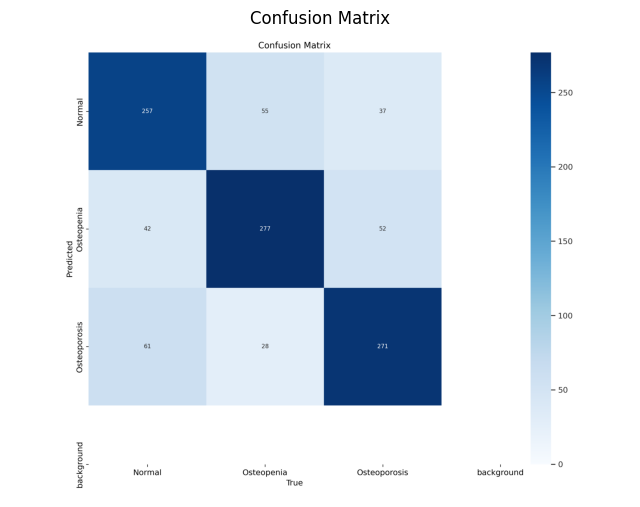

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to the saved confusion matrix image
conf_matrix_path = "runs/classify/train22/confusion_matrix.png"

# Open and display the confusion matrix
conf_matrix_img = Image.open(conf_matrix_path)
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix_img)
plt.axis("off")
plt.title("Confusion Matrix")
plt.show()


#Data prepration

In [15]:
import os
import pandas as pd

# -------------------------------------------
# ✅ 1. Set Dataset Paths
# -------------------------------------------
dataset_path = "/content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification"

# -------------------------------------------
# ✅ 2. Collect Image Paths & Labels
# -------------------------------------------
data = []

# Loop through train, val, and test folders
for split in ["train", "val", "test"]:
    split_path = os.path.join(dataset_path, split)

    # Get class names inside each split folder
    class_dirs = [d for d in os.listdir(split_path) if os.path.isdir(os.path.join(split_path, d))]
    print(f"🔹 Found classes in {split}: {class_dirs}")

    for class_name in class_dirs:
        class_path = os.path.join(split_path, class_name)
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

        for img_file in image_files:
            file_path = os.path.join(class_path, img_file)
            data.append({"file_path": file_path, "label": class_name, "split": split})  # Include split info

# Create DataFrame
df = pd.DataFrame(data)

# -------------------------------------------
# ✅ 3. Display Dataset Info
# -------------------------------------------
print(f"\n✅ Total images found: {len(df)}")
print(df.head())

# Group by split
print("\n📊 Dataset Distribution:")
print(df["split"].value_counts())


🔹 Found classes in train: ['Normal', 'Osteopenia', 'Osteoporosis']
🔹 Found classes in val: ['Osteopenia', 'Osteoporosis', 'Normal']
🔹 Found classes in test: ['Normal', 'Osteopenia', 'Osteoporosis']

✅ Total images found: 5400
                                           file_path   label  split
0  /content/drive/MyDrive/Datasets/knee-osteoarth...  Normal  train
1  /content/drive/MyDrive/Datasets/knee-osteoarth...  Normal  train
2  /content/drive/MyDrive/Datasets/knee-osteoarth...  Normal  train
3  /content/drive/MyDrive/Datasets/knee-osteoarth...  Normal  train
4  /content/drive/MyDrive/Datasets/knee-osteoarth...  Normal  train

📊 Dataset Distribution:
split
train    3780
val      1080
test      540
Name: count, dtype: int64


#Data transformation and Augmentations

In [22]:
import os
import pandas as pd

# -------------------------------------------
# ✅ 1. Set Dataset Paths
# -------------------------------------------
dataset_path = "/content/drive/MyDrive/Datasets/knee-osteoarthritis-classification/Knee Osteoarthritis Classification"

# -------------------------------------------
# ✅ 2. Collect Image Paths & Labels Separately for Train, Val, and Test
# -------------------------------------------
def create_dataframe(split):
    """Creates a DataFrame for a given dataset split (train, val, test)."""
    split_path = os.path.join(dataset_path, split)
    data = []

    # Get class names inside the split folder
    class_dirs = [d for d in os.listdir(split_path) if os.path.isdir(os.path.join(split_path, d))]
    print(f"🔹 Found classes in {split}: {class_dirs}")

    for class_name in class_dirs:
        class_path = os.path.join(split_path, class_name)
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

        for img_file in image_files:
            file_path = os.path.join(class_path, img_file)
            data.append({"file_path": file_path, "label": class_name})

    return pd.DataFrame(data)

# Create separate DataFrames
train_df = create_dataframe("train")
val_df = create_dataframe("val")
test_df = create_dataframe("test")

# -------------------------------------------
# ✅ 3. Display Dataset Info
# -------------------------------------------
print(f"\n✅ Total Training Images: {len(train_df)}")
print(train_df.head())

print(f"\n✅ Total Validation Images: {len(val_df)}")
print(val_df.head())

print(f"\n✅ Total Test Images: {len(test_df)}")
print(test_df.head())


🔹 Found classes in train: ['Normal', 'Osteopenia', 'Osteoporosis']
🔹 Found classes in val: ['Osteopenia', 'Osteoporosis', 'Normal']
🔹 Found classes in test: ['Normal', 'Osteopenia', 'Osteoporosis']

✅ Total Training Images: 3780
                                           file_path   label
0  /content/drive/MyDrive/Datasets/knee-osteoarth...  Normal
1  /content/drive/MyDrive/Datasets/knee-osteoarth...  Normal
2  /content/drive/MyDrive/Datasets/knee-osteoarth...  Normal
3  /content/drive/MyDrive/Datasets/knee-osteoarth...  Normal
4  /content/drive/MyDrive/Datasets/knee-osteoarth...  Normal

✅ Total Validation Images: 1080
                                           file_path       label
0  /content/drive/MyDrive/Datasets/knee-osteoarth...  Osteopenia
1  /content/drive/MyDrive/Datasets/knee-osteoarth...  Osteopenia
2  /content/drive/MyDrive/Datasets/knee-osteoarth...  Osteopenia
3  /content/drive/MyDrive/Datasets/knee-osteoarth...  Osteopenia
4  /content/drive/MyDrive/Datasets/knee-osteoar

In [23]:
train_df.shape

(3780, 2)

In [24]:
val_df.shape

(1080, 2)

In [25]:
test_df.shape

(540, 2)

In [27]:
traindf_label_value_counts = train_df['label'].value_counts()
validdf_label_value_counts = val_df['label'].value_counts()
testdf_label_value_counts = test_df['label'].value_counts()

In [28]:
print("distribution of train data")
print(traindf_label_value_counts)
print("distribution of valid data")
print(validdf_label_value_counts)
print("distribution of test data")
print(testdf_label_value_counts)

distribution of train data
label
Normal          1260
Osteopenia      1260
Osteoporosis    1260
Name: count, dtype: int64
distribution of valid data
label
Osteopenia      360
Osteoporosis    360
Normal          360
Name: count, dtype: int64
distribution of test data
label
Normal          180
Osteopenia      180
Osteoporosis    180
Name: count, dtype: int64


In [30]:
print(f'how many rows are duplicated in train dataset ? : {train_df.duplicated().sum()}')
print(f'how many rows are duplicated in valid dataset? : {val_df.duplicated().sum()}')
print(f'how many rows are duplicated in test dataset ? : {test_df.duplicated().sum()}')


how many rows are duplicated in train dataset ? : 0
how many rows are duplicated in valid dataset? : 0
how many rows are duplicated in test dataset ? : 0


In [31]:
classes_names = train_df['label'].unique()
print(f'classes names in dataset : {classes_names}')


classes names in dataset : ['Normal' 'Osteopenia' 'Osteoporosis']


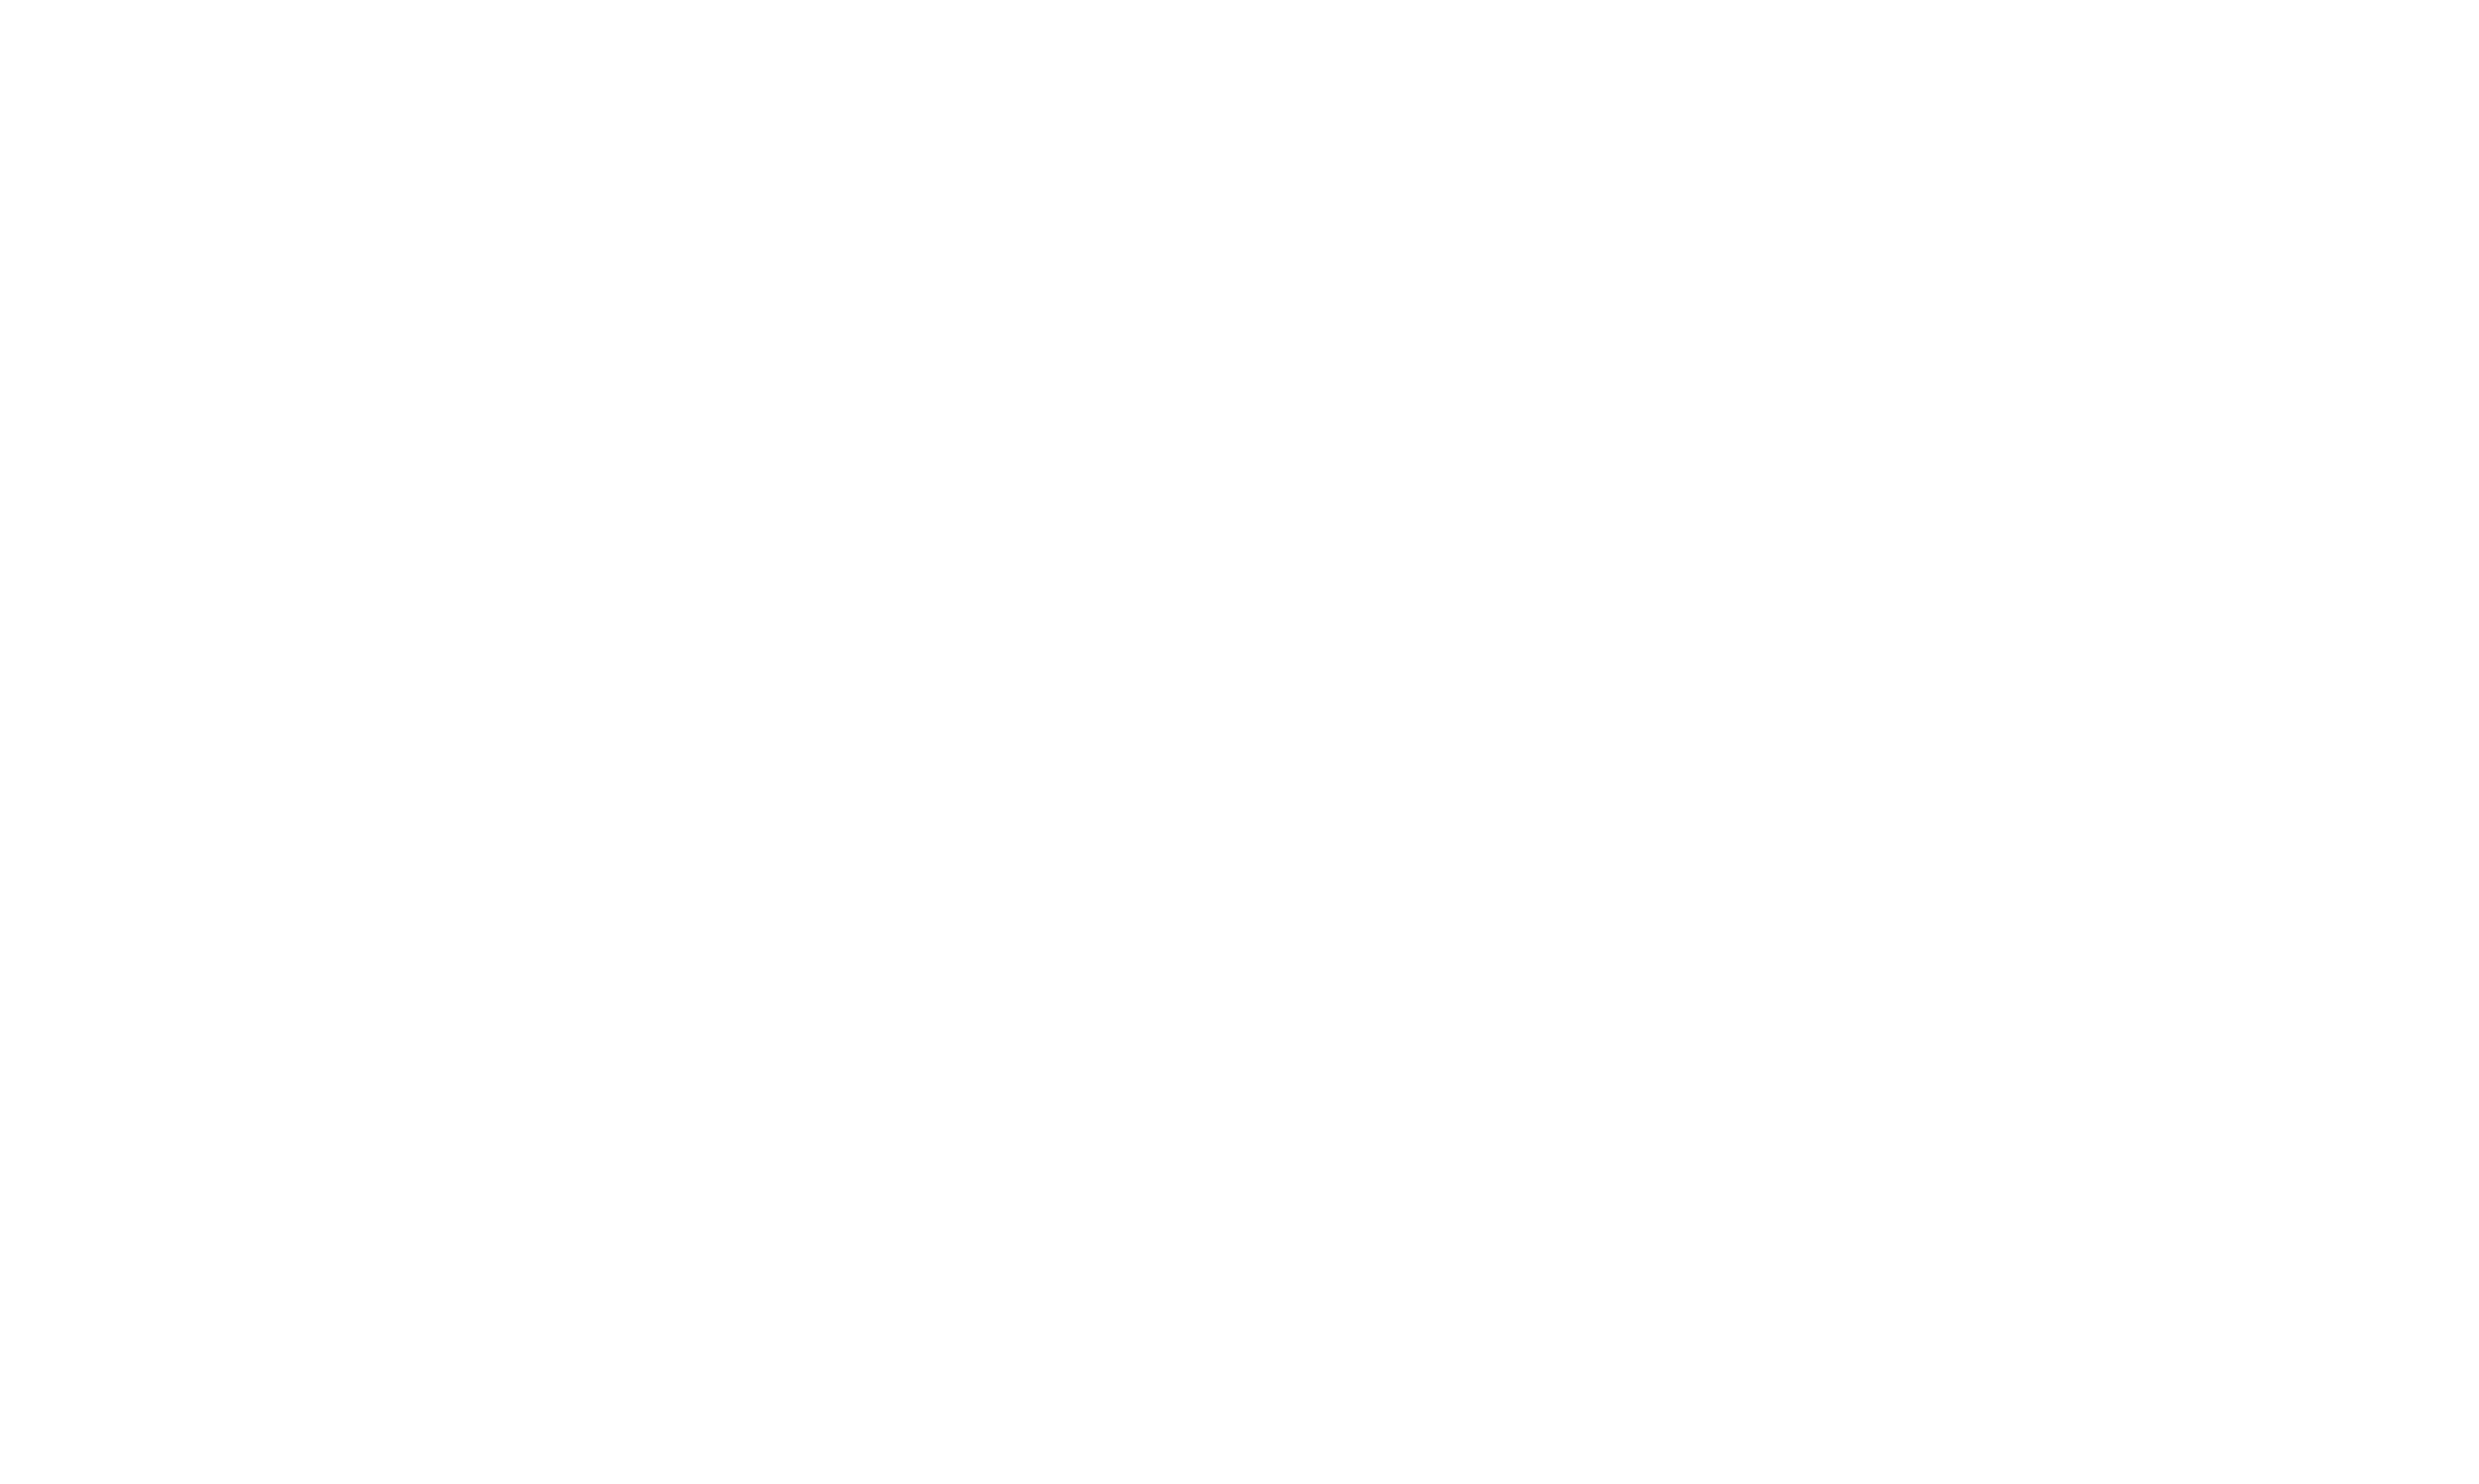

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Assuming the following class names are mapped correctly to integer labels
class_labels = ['Normal', 'Osteopenia', 'Osteoporosis']
class_colors = {
    "Normal": "blue",
    "Osteopenia": "orange",
    "Osteoporosis": "purple"
}

# Map class names to integer indices (assuming these are the same as in your dataset)
label_mapping = {
    'Normal': 0,
    'Osteopenia': 1,
    'Osteoporosis': 2
}

# Collect file paths for each class
samples_per_class = 10
image_paths = {}

# Now, we need to access the correct rows using integer-based labels
for class_name, class_idx in label_mapping.items():
    # Get the file paths for the corresponding label index (which should be integer-based in train_df)
    file_paths = train_df[train_df['label'] == class_idx]['file_path'].values

    # If a class has fewer than 10 images, take all available images
    if len(file_paths) > 0:
        image_paths[class_name] = np.random.choice(file_paths, min(samples_per_class, len(file_paths)), replace=False)
    else:
        image_paths[class_name] = []  # Empty list if no images exist

# Set up subplot grid (3 rows for 3 classes, 10 columns)
fig, axes = plt.subplots(nrows=len(class_labels), ncols=10, figsize=(30, 18))

# Function to display images with fancy borders
def display_image(ax, img_path, title, border_color):
    try:
        img = mpimg.imread(img_path)
        ax.imshow(img, cmap="gray")  # Display in grayscale
        ax.set_xticks([])  # Hide x-axis ticks
        ax.set_yticks([])  # Hide y-axis ticks
        ax.set_title(title, fontsize=14, fontweight="bold", color=border_color, pad=10)

        # Add border effect by setting the edge color of the subplot
        for spine in ax.spines.values():
            spine.set_edgecolor(border_color)
            spine.set_linewidth(3)

    except Exception as e:
        ax.axis("off")  # Hide empty images if there's an issue

# Populate subplots with images
for row, (class_name, img_list) in enumerate(image_paths.items()):
    for col in range(10):  # Ensure each row has 10 images
        if col < len(img_list):
            display_image(axes[row, col], img_list[col], class_name, class_colors[class_name])
        else:
            axes[row, col].axis("off")  # Hide empty subplots if fewer than 10 images

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


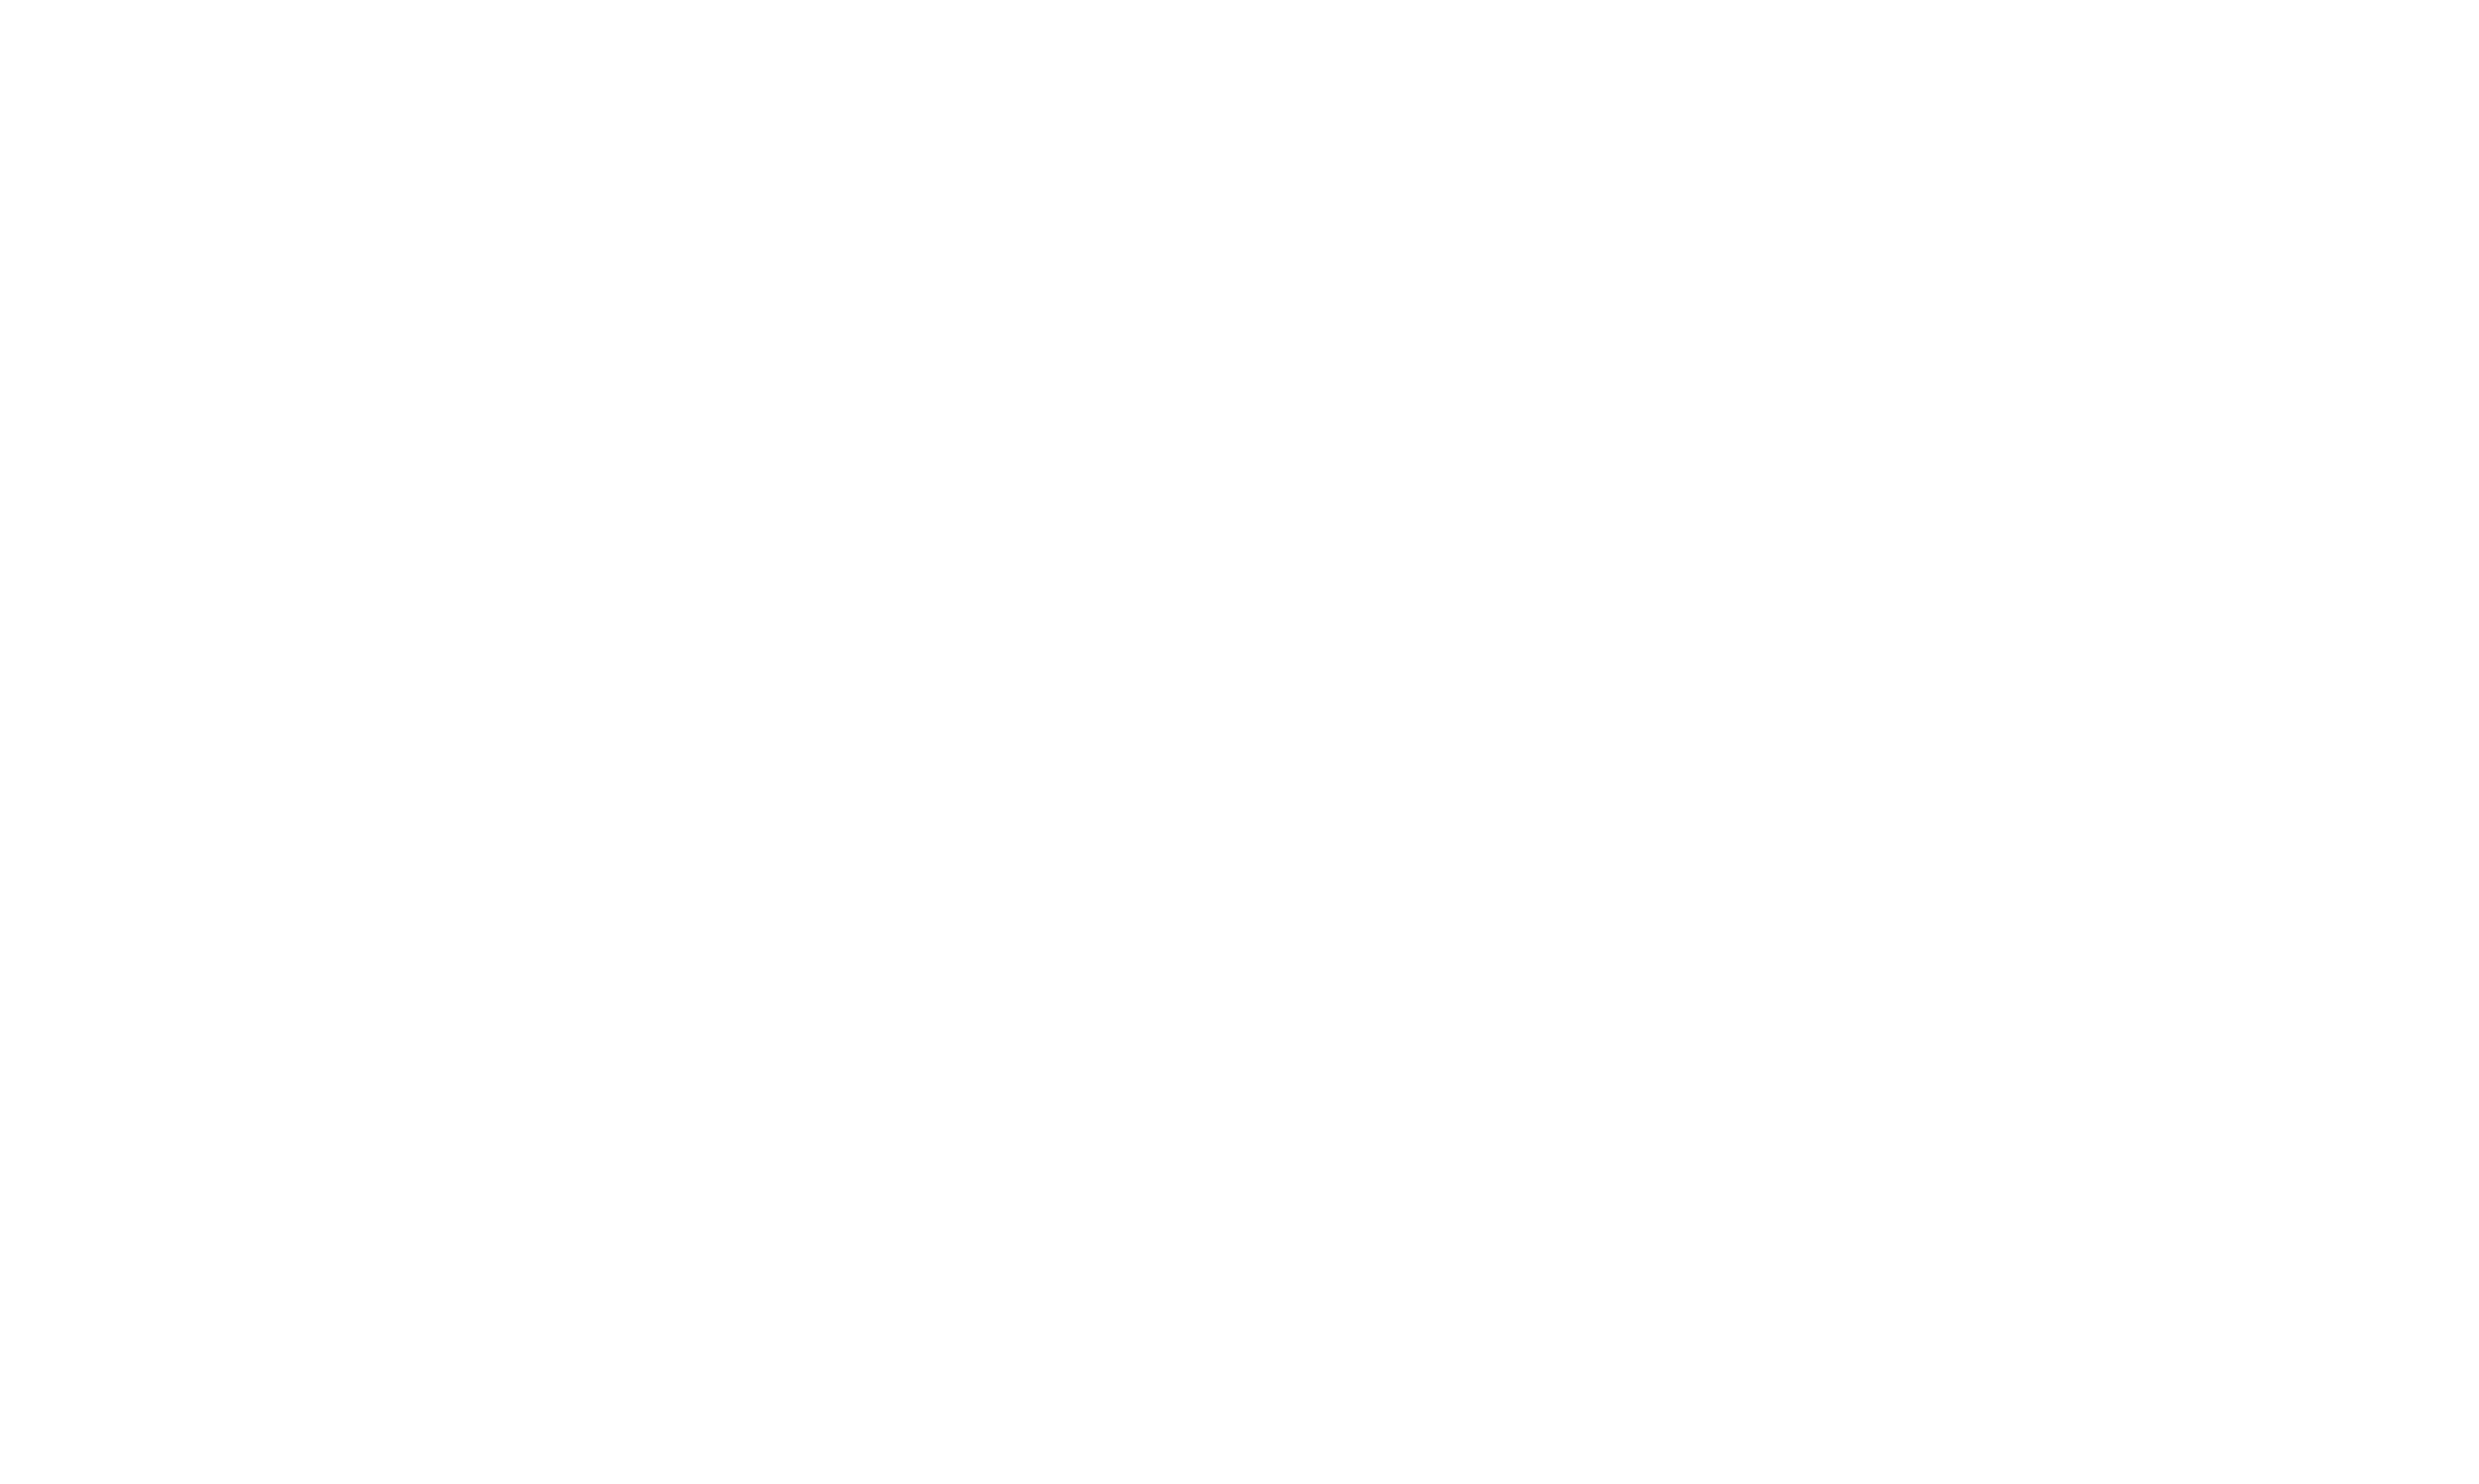

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Define class labels and the corresponding integer mappings
class_labels = ["Normal", "Mild", "Severe"]
class_colors = {
    "Normal": "blue",
    "Mild": "green",
    "Severe": "red"
}

# Collect file paths for each class
samples_per_class = 10
image_paths = {}

# Map class labels to their corresponding integer values in the dataset
class_to_idx = {label: idx for idx, label in enumerate(class_labels)}

# Collect image file paths per class
for class_name in class_labels:
    # Get the integer value for the class
    class_idx = class_to_idx[class_name]

    # Filter the train dataframe for the current class
    file_paths = train_df[train_df['label'] == class_idx]['file_path'].values

    # Randomly sample images if there are more than 'samples_per_class' images
    if len(file_paths) > 0:
        image_paths[class_name] = np.random.choice(file_paths, min(samples_per_class, len(file_paths)), replace=False)
    else:
        image_paths[class_name] = []  # Empty list if no images exist

# Set up subplot grid (3 rows for 3 classes, 10 columns)
fig, axes = plt.subplots(nrows=len(class_labels), ncols=10, figsize=(30, 18))

# Function to display images with fancy borders
def display_image(ax, img_path, title, border_color):
    try:
        img = mpimg.imread(img_path)
        ax.imshow(img, cmap="gray")  # Display in grayscale
        ax.set_xticks([])  # Hide x-axis ticks
        ax.set_yticks([])  # Hide y-axis ticks
        ax.set_title(title, fontsize=14, fontweight="bold", color=border_color, pad=10)

        # Add border effect by setting the edge color of the subplot
        for spine in ax.spines.values():
            spine.set_edgecolor(border_color)
            spine.set_linewidth(3)

    except Exception as e:
        ax.axis("off")  # Hide empty images if there's an issue

# Populate subplots with images
for row, (class_name, img_list) in enumerate(image_paths.items()):
    for col in range(10):  # Ensure each row has 10 images
        if col < len(img_list):
            display_image(axes[row, col], img_list[col], class_name, class_colors[class_name])
        else:
            axes[row, col].axis("off")  # Hide empty subplots if fewer than 10 images

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [39]:
import os
import torch
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image, ImageFile
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

# ✅ Handle corrupted images gracefully
ImageFile.LOAD_TRUNCATED_IMAGES = True

# ✅ **Apply Label Encoding to Convert Categorical Labels into Numeric Form**
label_encoder = LabelEncoder()

# Apply encoding to labels in DataFrame
train_df['label'] = label_encoder.fit_transform(train_df['label'])
val_df['label'] = label_encoder.transform(val_df['label'])
test_df['label'] = label_encoder.transform(test_df['label'])

# ✅ **Optimized Data Augmentation for Training**
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomAffine(degrees=10, translate=(0.05, 0.05), scale=(0.9, 1.1)),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ✅ **Minimal Transformations for Validation & Test Data**
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ✅ **Custom Dataset Class with Improved Error Handling**
class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]
        label = self.dataframe.iloc[idx, 1]  # The label should already be encoded

        # Check if the image file exists
        if not os.path.isfile(img_path):
            print(f"⚠ Warning: Missing file {img_path}")
            return None

        try:
            img = Image.open(img_path).convert('RGB')
        except Exception as e:
            print(f"❌ Error loading image {img_path}: {e}")
            return None

        if self.transform:
            img = self.transform(img)

        # Ensure label is a tensor and is of the correct type (long integer)
        return img, torch.tensor(label, dtype=torch.long)  # Ensure label is numeric

# ✅ **Create Datasets**
train_dataset = CustomDataset(train_df, transform=train_transform)  # Ensure train_df is defined
valid_dataset = CustomDataset(val_df, transform=test_transform)
test_dataset = CustomDataset(test_df, transform=test_transform)

# ✅ **Optimized DataLoaders for Performance**
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(valid_dataset, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

# ✅ **Dataset Summary**
print(f"✅ Training dataset size: {len(train_loader.dataset)}")
print(f"✅ Validation dataset size: {len(val_loader.dataset)}")
print(f"✅ Test dataset size: {len(test_loader.dataset)}")

# ✅ **Show Class Encoding**
print("\nLabel Encoding Mapping:")
for class_name, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"  {class_name} → {encoded_value}")


✅ Training dataset size: 3780
✅ Validation dataset size: 1080
✅ Test dataset size: 540

Label Encoding Mapping:
  Normal → 0
  Osteopenia → 1
  Osteoporosis → 2


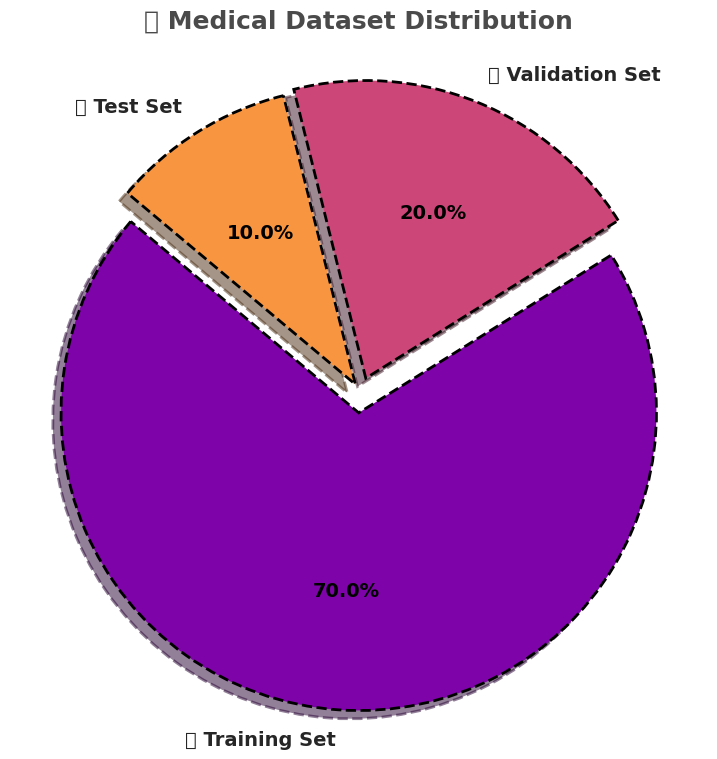

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create an attractive pie chart
def plot_pie_chart(sizes, labels, title):
    colors = sns.color_palette("plasma", len(sizes))  # Vibrant color theme 🌈
    explode = [0.07, 0.05, 0.03]  # Different explode values for emphasis 💥

    plt.figure(figsize=(9, 9))  # Slightly larger size for better visibility
    wedges, texts, autotexts = plt.pie(
        sizes, labels=labels, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode, shadow=True,
        wedgeprops={'edgecolor': 'black', 'linewidth': 2, 'linestyle': '--'}
    )

    # Customize text appearance 🎨
    for text in texts:
        text.set_fontsize(14)
        text.set_fontweight('bold')

    for autotext in autotexts:
        autotext.set_fontsize(14)
        autotext.set_color('black')  # Increased contrast for better readability
        autotext.set_fontweight('bold')

    # Add a title with an emoji 📊
    plt.title(title, fontsize=18, fontweight='bold', color="#4A4A4A", pad=15)
    plt.axis('equal')  # Keep the pie circular
    plt.show()

# Get the dataset sizes
train_size = len(train_loader.dataset)
val_size = len(val_loader.dataset)
test_size = len(test_loader.dataset)

# Labels and sizes
sizes = [train_size, val_size, test_size]
labels = ['🟢 Training Set', '🔵 Validation Set', '🟠 Test Set']  # Emojis for fun!

# Plot the pie chart
plot_pie_chart(sizes, labels, '📊 Medical Dataset Distribution')


#Modeling

In [42]:

# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available!")
    # Get the current device
    current_device = torch.cuda.current_device()
    print(f"Current CUDA device: {current_device}")

    # Get the number of GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Number of available GPUs: {num_gpus}")

    # Get the name of the GPU
    for i in range(num_gpus):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("CUDA is not available.")






CUDA is available!
Current CUDA device: 0
Number of available GPUs: 1
GPU 0: Tesla T4


In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.cuda.amp import GradScaler
from torchsummary import summary
import torchvision.models as models

# ===========================================================
# 🔥 **Fully Fine-Tuned ResNeXt-101 Model**
# ===========================================================
class ResNeXt101FineTuned(nn.Module):
    def __init__(self, num_classes=5):
        super(ResNeXt101FineTuned, self).__init__()

        # Load pre-trained ResNeXt-101 model
        self.resnext101 = models.resnext50_32x4d(pretrained=True)

        # ✅ Unfreeze ALL layers for full fine-tuning
        for param in self.resnext101.parameters():
            param.requires_grad = True

        # ✅ Modify the final classification layer to fit num_classes
        in_features = self.resnext101.fc.in_features
        self.resnext101.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.resnext101(x)

# ===========================================================
# ✅ **Initialize Model & Move to GPU**
# ===========================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNeXt101FineTuned(num_classes=5).to(device)

# ✅ Print Model Summary with 224x224 input size (since images are resized)
summary(model, (3, 224, 224))  # Adjusted input shape to 224x224 for resized images




Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:01<00:00, 60.6MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5          [-1, 128, 56, 56]           8,192
       BatchNorm2d-6          [-1, 128, 56, 56]             256
              ReLU-7          [-1, 128, 56, 56]               0
            Conv2d-8          [-1, 128, 56, 56]           4,608
       BatchNorm2d-9          [-1, 128, 56, 56]             256
             ReLU-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          32,768
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [44]:
# ✅ Define Hyperparameters
num_epochs = 50
lr = 1e-5  # Increased for better convergence
weight_decay = 2e-4  # Moderate regularization

# ✅ Loss Function: Use CrossEntropyLoss (for Multi-Class)
loss_fn = nn.CrossEntropyLoss()

# ✅ Optimizer: AdamW (Better Generalization)
optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)


# ✅ Learning Rate Scheduler: ReduceLROnPlateau
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',  # Reduce the learning rate when the validation loss stops decreasing
    factor=0.5,  # Reduce learning rate by 50%
    patience=3,  # Number of epochs with no improvement before reducing lr
    verbose=True  # Display when the learning rate is reduced
    #min_lr=1e-7  # Minimum learning rate (avoid going below this value)
)
# ✅ Gradient Scaling for Mixed Precision Training (Speed & Stability)
scaler = GradScaler()

# ✅ Model Training Check
print(f"✅ Model Initialized on {device}")


✅ Model Initialized on cuda


<ipython-input-44-1e2e8e8c2b86>:23: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


In [45]:
import os

class EarlyStopping:
    def __init__(self, patience=10, verbose=False, delta=0, monitor='loss'):
        """
        patience: How many epochs to wait before stopping.
        verbose: Whether to print progress.
        delta: Minimum change to qualify as an improvement.
        monitor: What to monitor ('loss' or 'accuracy').
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = float('inf') if monitor == 'loss' else -float('inf')  # Initialize based on monitor type
        self.best_epoch = 0
        self.early_stop = False
        self.delta = delta
        self.monitor = monitor  # What to monitor: 'loss' or 'accuracy'

    def __call__(self, val_score, epoch, model_weights, model_name_prefix):
        """
        val_score: The validation loss/accuracy in the current epoch.
        epoch: The current epoch.
        model_weights: The weights of the model (usually model.state_dict()).
        model_name_prefix: The prefix for the model's name (e.g., 'model_1', 'model_2').
        """
        # If monitoring 'loss', we expect the value to decrease
        if self.monitor == 'loss':
            if val_score < self.best_score - self.delta:
                self.best_score = val_score
                self.best_epoch = epoch
                self.counter = 0
                self.save_best_weights(model_weights, model_name_prefix)
            else:
                self.counter += 1
        # If monitoring 'accuracy', we expect the value to increase
        elif self.monitor == 'accuracy':
            if val_score > self.best_score + self.delta:
                self.best_score = val_score
                self.best_epoch = epoch
                self.counter = 0
                self.save_best_weights(model_weights, model_name_prefix)
            else:
                self.counter += 1

        if self.counter >= self.patience:
            self.early_stop = True
            if self.verbose:
                print(f"Early stopping triggered after {self.counter} epochs of no improvement.")

    def save_best_weights(self, model_weights, model_name_prefix):
        """
        Save the model weights with a unique name for each model.
        model_name_prefix: The prefix for the model's name (e.g., 'model_1', 'model_2').
        """
        model_name = f"{model_name_prefix}_epoch_{self.best_epoch + 1}.pth"

        # Clean up previous saved model files (optional, to avoid disk clutter)
        for file in os.listdir():
            if file.startswith(model_name_prefix) and file != model_name:
                os.remove(file)
                if self.verbose:
                    print(f"🗑️ Deleted old model file: {file}")

        torch.save(model_weights, model_name)
        if self.verbose:
            print(f"✅ Best model weights saved to {model_name}.")


In [46]:

# Training loop
best_val_loss = float('inf')  # Initialize best validation loss
best_model_weights = None

def train_and_validate(model, train_loader, valid_loader, optimizer, scheduler, criterion, model_name_prefix, epochs=25, device=None, early_stopping=None):

    # Store losses and accuracies
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []
    auc_scores = []

    for epoch in range(epochs):
        print(f'Epoch {epoch + 1}/{epochs}')
        print('-' * 50)

        # Training phase
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            # Ensure labels are Long for CrossEntropyLoss
            labels = labels.long()  # Cast labels to Long

            # Mixed precision forward pass
            with torch.amp.autocast('cuda'):

                raw_outputs = model(inputs)  # Get raw logits (not passed through softmax)
                loss = criterion(raw_outputs, labels)  # Compute loss

            # Backward pass with mixed precision
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item() * inputs.size(0)

            # Compute predictions (Get class with highest logit)
            with torch.no_grad():
                _, preds = torch.max(raw_outputs, 1)  # Preds are class indices
            correct_preds += torch.sum(preds == labels.data)
            total_preds += labels.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct_preds.double() / total_preds
        print(f'Training Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

        # Store training loss and accuracy
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        # Validation phase
        model.eval()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # Ensure labels are Long for CrossEntropyLoss
                labels = labels.long()  # Cast labels to Long

                with torch.amp.autocast('cuda'):
                    raw_outputs = model(inputs)  # Get raw logits
                    loss = criterion(raw_outputs, labels)  # Compute loss

                running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(raw_outputs, 1)  # Preds are class indices
                correct_preds += torch.sum(preds == labels.data)
                total_preds += labels.size(0)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        epoch_loss = running_loss / len(valid_loader.dataset)
        epoch_acc = correct_preds.double() / total_preds
        print(f'Validation Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

        # Store validation loss and accuracy
        valid_losses.append(epoch_loss)
        valid_accuracies.append(epoch_acc.item())


        # Step the scheduler based on validation loss
        scheduler.step(epoch_loss)

        # ✅ Early stopping check: save model based on validation loss
        if early_stopping is not None:
            early_stopping(epoch_loss, epoch, model.state_dict(), model_name_prefix="model")
            if early_stopping.early_stop:
                print(f"🚨 Early stopping triggered at epoch {epoch+1}.")
                break

        # ✅ Display confusion matrix & classification report every 5 epochs
        if epoch % 5 == 0 or early_stopping.early_stop:
            cm = confusion_matrix(all_labels, all_preds)
            plot_confusion_matrix(cm, classes=[i for i in range(len(set(all_labels)))])
            print("Classification Report:")
            print(classification_report(all_labels, all_preds))

    # ✅ Load the best model weights from early stopping
    print("Loading best model weights...")
    model.load_state_dict(torch.load("model_epoch_{}.pth".format(early_stopping.best_epoch + 1)))

    # ✅ Plot training metrics
    plot_metrics(train_losses, valid_losses, train_accuracies, valid_accuracies)


    return model





# Helper function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, cbar=False)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


# Helper function to plot losses, accuracies, and AUC scores
def plot_metrics(train_losses, valid_losses, train_accuracies, valid_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(16, 8))

    # Plot training and validation loss
    plt.subplot(1, 3, 1)
    plt.plot(epochs, train_losses, label='Training Loss', color='blue')
    plt.plot(epochs, valid_losses, label='Validation Loss', color='red')
    plt.title('Loss per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 3, 2)
    plt.plot(epochs, train_accuracies, label='Training Accuracy', color='blue')
    plt.plot(epochs, valid_accuracies, label='Validation Accuracy', color='red')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()



    plt.tight_layout()
    plt.show()


In [47]:
import torch
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def test_model(model, test_loader, criterion, device, num_classes=6):
    """
    Evaluates the model on the test set, computes loss and accuracy,
    and displays the confusion matrix and classification report.

    Args:
        model: The trained PyTorch model.
        test_loader: DataLoader for the test set.
        criterion: The loss function used during training (e.g., CrossEntropyLoss).
        device: The device to run inference on (e.g., torch.device('cuda') or torch.device('cpu')).
        num_classes: The number of classes in the classification task.
    """
    model.eval()  # Set model to evaluation mode
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Use autocast for mixed precision inference
            with torch.amp.autocast('cuda'):
                raw_outputs = model(inputs)  # Get raw logits from the model
                loss = criterion(raw_outputs, labels)  # Compute loss

            running_loss += loss.item() * inputs.size(0)

            # Get class predictions (highest probability for multi-class)
            _, preds = torch.max(raw_outputs, 1)

            # Update accuracy counters
            correct_preds += torch.sum(preds == labels.data)
            total_preds += labels.size(0)

            # Accumulate for metrics
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate overall test loss and accuracy
    test_loss = running_loss / len(test_loader.dataset)
    test_accuracy = correct_preds.double() / total_preds

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Compute confusion matrix and classification report
    cm = confusion_matrix(all_labels, all_preds)
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(num_classes)]))

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(num_classes)], yticklabels=[str(i) for i in range(num_classes)])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


Epoch 1/25
--------------------------------------------------
Training Loss: 1.2603, Accuracy: 0.5362
Validation Loss: 1.1083, Accuracy: 0.5991
✅ Best model weights saved to model_epoch_1.pth.


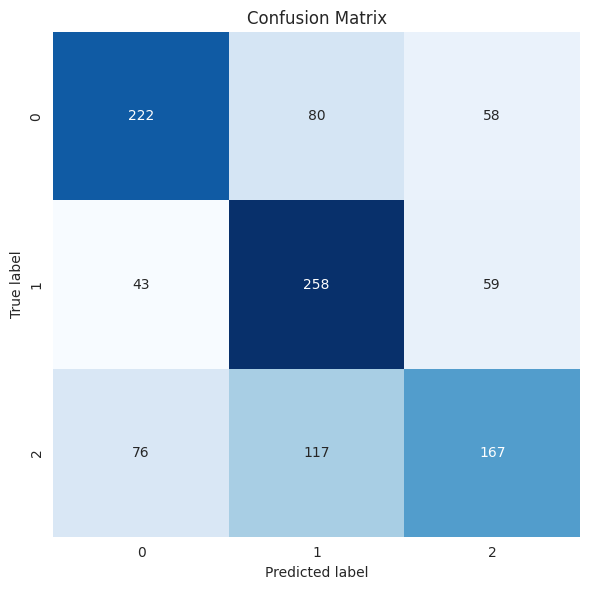

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.62      0.63       360
           1       0.57      0.72      0.63       360
           2       0.59      0.46      0.52       360

    accuracy                           0.60      1080
   macro avg       0.60      0.60      0.60      1080
weighted avg       0.60      0.60      0.60      1080

Epoch 2/25
--------------------------------------------------
Training Loss: 0.8845, Accuracy: 0.6680
Validation Loss: 0.9273, Accuracy: 0.6500
🗑️ Deleted old model file: model_epoch_1.pth
✅ Best model weights saved to model_epoch_2.pth.
Epoch 3/25
--------------------------------------------------
Training Loss: 0.7695, Accuracy: 0.6926
Validation Loss: 0.8340, Accuracy: 0.6657
🗑️ Deleted old model file: model_epoch_2.pth
✅ Best model weights saved to model_epoch_3.pth.
Epoch 4/25
--------------------------------------------------
Training Loss: 0.7045, Accuracy: 0.7050
Validation Loss: 0

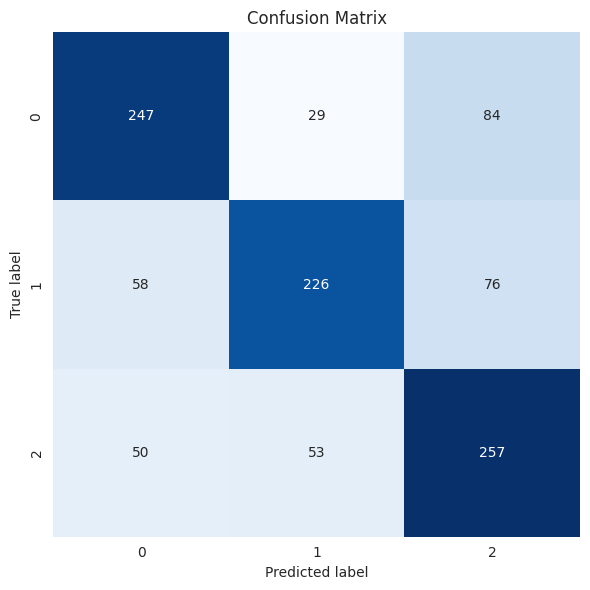

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.69       360
           1       0.73      0.63      0.68       360
           2       0.62      0.71      0.66       360

    accuracy                           0.68      1080
   macro avg       0.68      0.68      0.68      1080
weighted avg       0.68      0.68      0.68      1080

Epoch 7/25
--------------------------------------------------
Training Loss: 0.5916, Accuracy: 0.7492
Validation Loss: 0.7165, Accuracy: 0.6981
🗑️ Deleted old model file: model_epoch_6.pth
✅ Best model weights saved to model_epoch_7.pth.
Epoch 8/25
--------------------------------------------------
Training Loss: 0.5696, Accuracy: 0.7598
Validation Loss: 0.7099, Accuracy: 0.6796
🗑️ Deleted old model file: model_epoch_7.pth
✅ Best model weights saved to model_epoch_8.pth.
Epoch 9/25
--------------------------------------------------
Training Loss: 0.5314, Accuracy: 0.7757
Validation Loss: 0

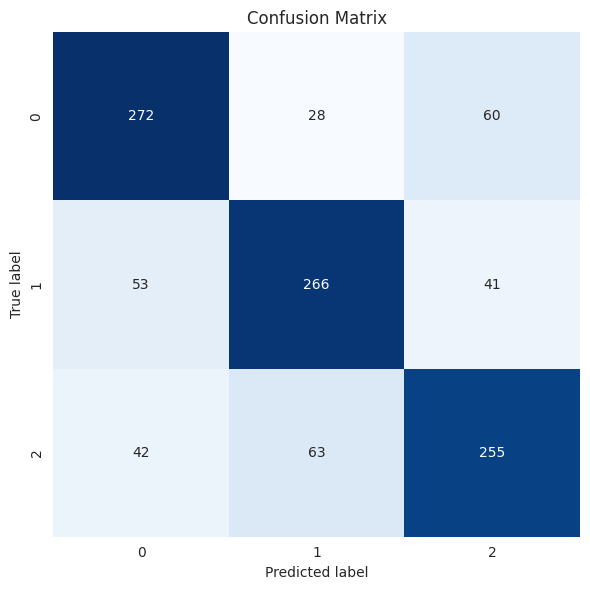

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       360
           1       0.75      0.74      0.74       360
           2       0.72      0.71      0.71       360

    accuracy                           0.73      1080
   macro avg       0.73      0.73      0.73      1080
weighted avg       0.73      0.73      0.73      1080

Epoch 12/25
--------------------------------------------------
Training Loss: 0.4589, Accuracy: 0.8077
Validation Loss: 0.6437, Accuracy: 0.7046
Epoch 13/25
--------------------------------------------------
Training Loss: 0.4420, Accuracy: 0.8127
Validation Loss: 0.6186, Accuracy: 0.7157
🗑️ Deleted old model file: model_epoch_11.pth
✅ Best model weights saved to model_epoch_13.pth.
Epoch 14/25
--------------------------------------------------
Training Loss: 0.4151, Accuracy: 0.8336
Validation Loss: 0.5944, Accuracy: 0.7426
🗑️ Deleted old model file: model_epoch_13.pth
✅ Best model weight

In [ ]:
# Example:
early_stopping = EarlyStopping(patience=5, verbose=True, delta=0)
model_name_prefix = "model_resnext50"  # Or dynamically change this per model
trained_model = train_and_validate(
    model,
    train_loader,
    val_loader,
    optimizer,
    scheduler,
    loss_fn,
    epochs=25,
    device=device,
    early_stopping=early_stopping,
    model_name_prefix=model_name_prefix)

